In [114]:
import json
import pandas as pd
import numpy as np
import sklearn as sk
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [115]:
prices_df = pd.read_json("prices.json")

In [116]:
sentiment_json = json.load(open("sentiment.json"))

In [117]:
sentiment_df = pd.DataFrame(sentiment_json)

In [118]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 37 columns):
30day_bull_prop                1694 non-null float64
30day_bull_prop_rollingz_60    1665 non-null float64
30day_sentiment                1694 non-null float64
30day_total                    1736 non-null int64
7day_bull_prop                 1655 non-null float64
7day_sentiment                 1655 non-null float64
7day_total                     1736 non-null int64
90day_bull_prop                1694 non-null float64
90day_bull_prop_rollingz_60    1665 non-null float64
90day_sentiment                1694 non-null float64
90day_total                    1736 non-null int64
bear_prop                      1384 non-null float64
bull_prop                      1384 non-null float64
bull_prop_rollingz_15          1308 non-null float64
cumulative_abs                 1735 non-null float64
cumulative_avg                 1692 non-null float64
cumulative_z                   1735 non-null float6

In [119]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 17 columns):
annualized_volatility          1087 non-null float64
beta                           1 non-null float64
daily_average_volume_10        1087 non-null float64
daily_average_volume_30        1087 non-null float64
date                           1087 non-null datetime64[ns]
high                           1087 non-null float64
last                           1087 non-null float64
low                            1087 non-null float64
market_cap                     1087 non-null float64
monthly_return                 1087 non-null float64
open                           1087 non-null float64
quarterly_return               1087 non-null float64
risk_adjusted_annual_return    1087 non-null float64
shares_outstanding             1087 non-null int64
ttm_total_return               1087 non-null float64
volume                         1087 non-null int64
weekly_return                  1087 non-null 

In [120]:
sentiment_df.date = pd.to_datetime(sentiment_df.date)

In [121]:
combined_df = pd.merge(prices_df, sentiment_df, on='date')

In [122]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1086 entries, 0 to 1085
Data columns (total 53 columns):
annualized_volatility          1086 non-null float64
beta                           0 non-null float64
daily_average_volume_10        1086 non-null float64
daily_average_volume_30        1086 non-null float64
date                           1086 non-null datetime64[ns]
high                           1086 non-null float64
last                           1086 non-null float64
low                            1086 non-null float64
market_cap                     1086 non-null float64
monthly_return                 1086 non-null float64
open                           1086 non-null float64
quarterly_return               1086 non-null float64
risk_adjusted_annual_return    1086 non-null float64
shares_outstanding             1086 non-null int64
ttm_total_return               1086 non-null float64
volume                         1086 non-null int64
weekly_return                  1086 non-null 

In [123]:
def assess_NA(data):
    """
    Returns a pandas dataframe denoting the total number of NA values and the percentage of NA values in each column.
    The column names are noted on the index.
    
    Parameters
    ----------
    data: dataframe
    """
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA

In [124]:
df_na = assess_NA(combined_df)

In [125]:
combined_df = combined_df.drop("beta",axis=1)

In [126]:
combined_df = combined_df.fillna(combined_df.mean())

In [127]:
combined_df = combined_df.set_index("date")

In [128]:
stock_last = combined_df["last"]
stock_low = combined_df["low"]
stock_open = combined_df["open"]
stock_high = combined_df["high"]


In [129]:
combined_df = combined_df.drop(combined_df[["last", "low", "open", "high"]], axis=1)

In [130]:
corr_matrix = combined_df.corr()

In [131]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [132]:
corr_matrix.style.background_gradient(cmap='coolwarm')

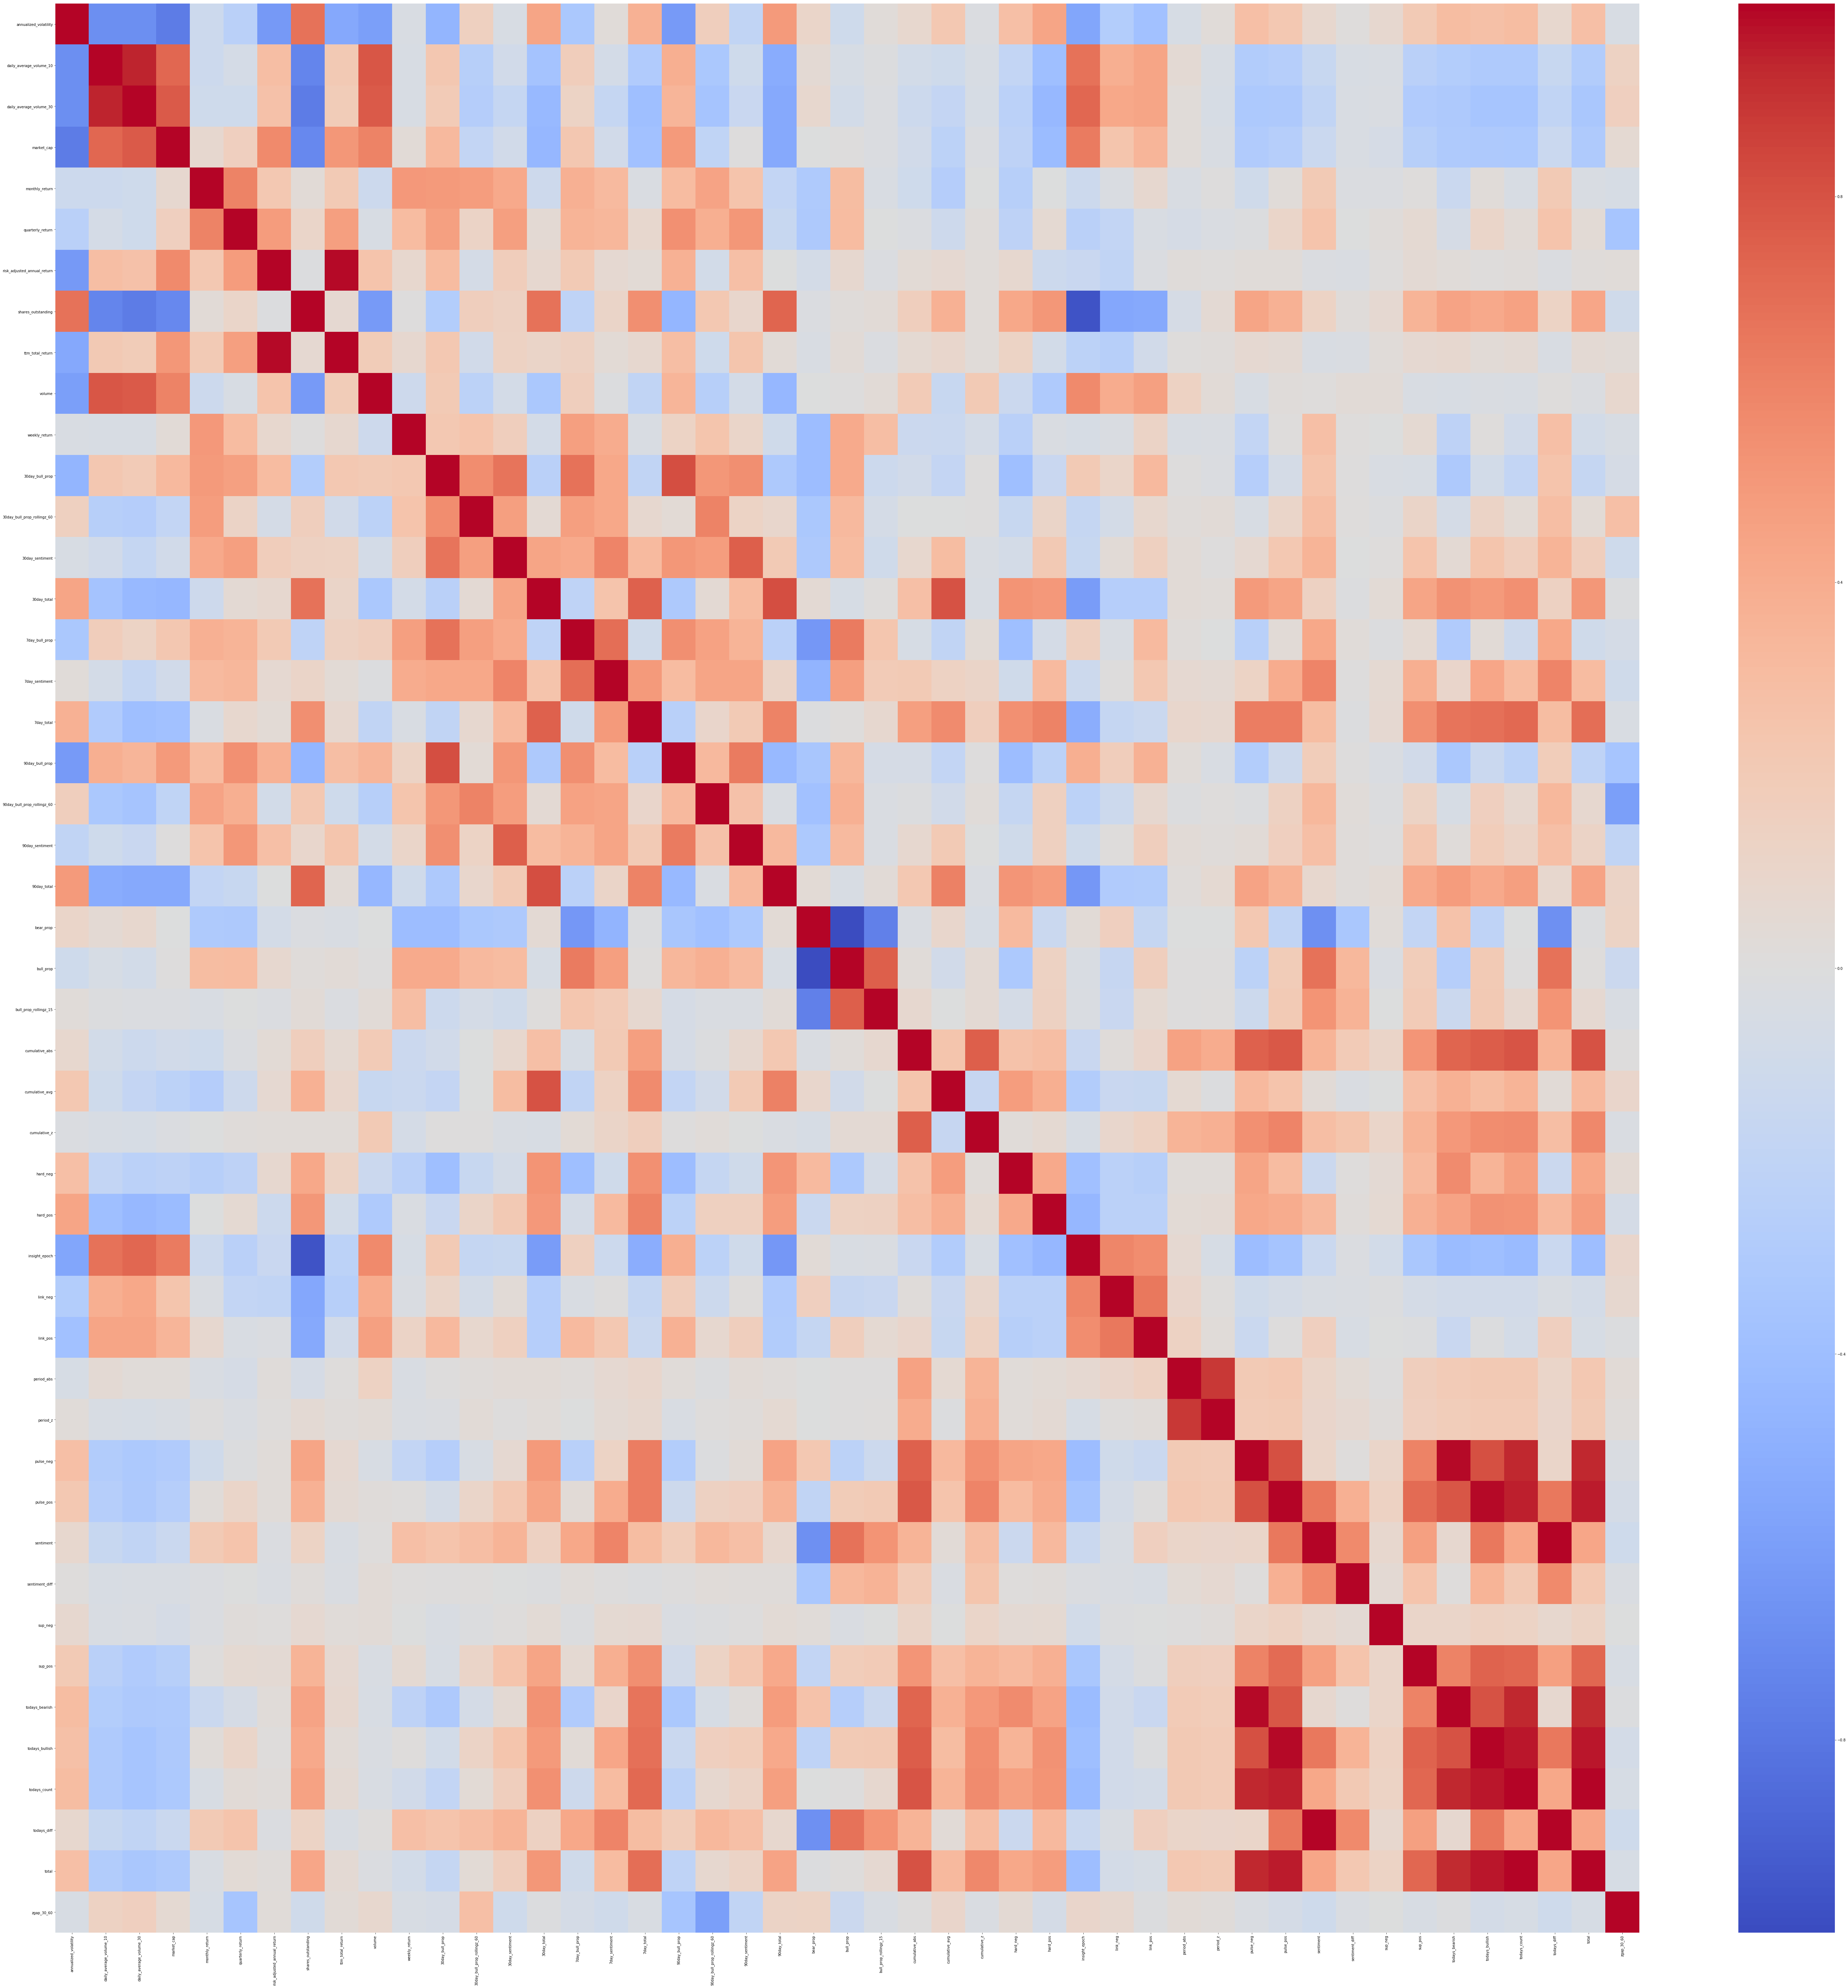

In [133]:
f = plt.figure(figsize=(100, 100))
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, cmap='coolwarm')
plt.savefig('Correlation Matrix SNS.png')

In [134]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [135]:
# Drop features 
combined_df = combined_df.drop(combined_df[to_drop], axis=1)

In [136]:
corr_matrix[to_drop].fillna(0).style.background_gradient(cmap='coolwarm')

,daily_average_volume_30,ttm_total_return,todays_bearish,todays_bullish,todays_count,todays_diff,total
annualized_volatility,-0.679777,-0.544058,0.302855,0.276621,0.303094,0.079078,0.281482
daily_average_volume_10,0.94368,0.212614,-0.274006,-0.299233,-0.303564,-0.153097,-0.288784
daily_average_volume_30,1,0.190379,-0.310477,-0.349899,-0.350464,-0.191526,-0.333451
market_cap,0.765912,0.512748,-0.298849,-0.307965,-0.320062,-0.136334,-0.303491
monthly_return,-0.109287,0.205204,-0.132834,0.0256325,-0.0448689,0.210094,-0.0363943
quarterly_return,-0.106785,0.474909,-0.0581343,0.107608,0.0381276,0.252494,0.0459085
risk_adjusted_annual_return,0.26967,0.98806,0.0289422,0.00910564,0.0185798,-0.0213071,0.0227512
shares_outstanding,-0.775671,0.0635895,0.451938,0.42135,0.457424,0.132263,0.433207
ttm_total_return,0.190379,1,0.0707747,0.0341527,0.0525578,-0.0323068,0.0540526
volume,0.765751,0.189875,-0.0452627,-0.0287444,-0.037749,0.00916406,-0.017704


In [137]:
combined_df.var()

annualized_volatility          1.222286e-03
daily_average_volume_10        3.737370e+14
market_cap                     1.146488e+22
monthly_return                 6.023177e-03
quarterly_return               2.354917e-02
risk_adjusted_annual_return    1.719068e+00
shares_outstanding             1.390711e+17
volume                         5.134536e+14
weekly_return                  1.380809e-03
30day_bull_prop                2.340298e-03
30day_bull_prop_rollingz_60    1.593778e+00
30day_sentiment                5.982143e+07
30day_total                    3.867559e+07
7day_bull_prop                 4.053633e-03
7day_sentiment                 1.065765e+07
7day_total                     4.443525e+06
90day_bull_prop                1.544622e-03
90day_bull_prop_rollingz_60    2.269522e+00
90day_sentiment                2.578472e+08
90day_total                    2.470726e+08
bear_prop                      8.199283e-03
bull_prop                      8.199283e-03
bull_prop_rollingz_15          1

In [138]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1086 entries, 2012-01-03 to 2016-04-18
Data columns (total 40 columns):
annualized_volatility          1086 non-null float64
daily_average_volume_10        1086 non-null float64
market_cap                     1086 non-null float64
monthly_return                 1086 non-null float64
quarterly_return               1086 non-null float64
risk_adjusted_annual_return    1086 non-null float64
shares_outstanding             1086 non-null int64
volume                         1086 non-null int64
weekly_return                  1086 non-null float64
30day_bull_prop                1086 non-null float64
30day_bull_prop_rollingz_60    1086 non-null float64
30day_sentiment                1086 non-null float64
30day_total                    1086 non-null int64
7day_bull_prop                 1086 non-null float64
7day_sentiment                 1086 non-null float64
7day_total                     1086 non-null int64
90day_bull_prop                1086

In [144]:
combined_df["last"] = stock_last

In [145]:
combined_df["low"] = stock_low
combined_df["high"] = stock_high
combined_df["open"] = stock_open

In [183]:
sns.set(rc={'figure.figsize':(11, 4)})

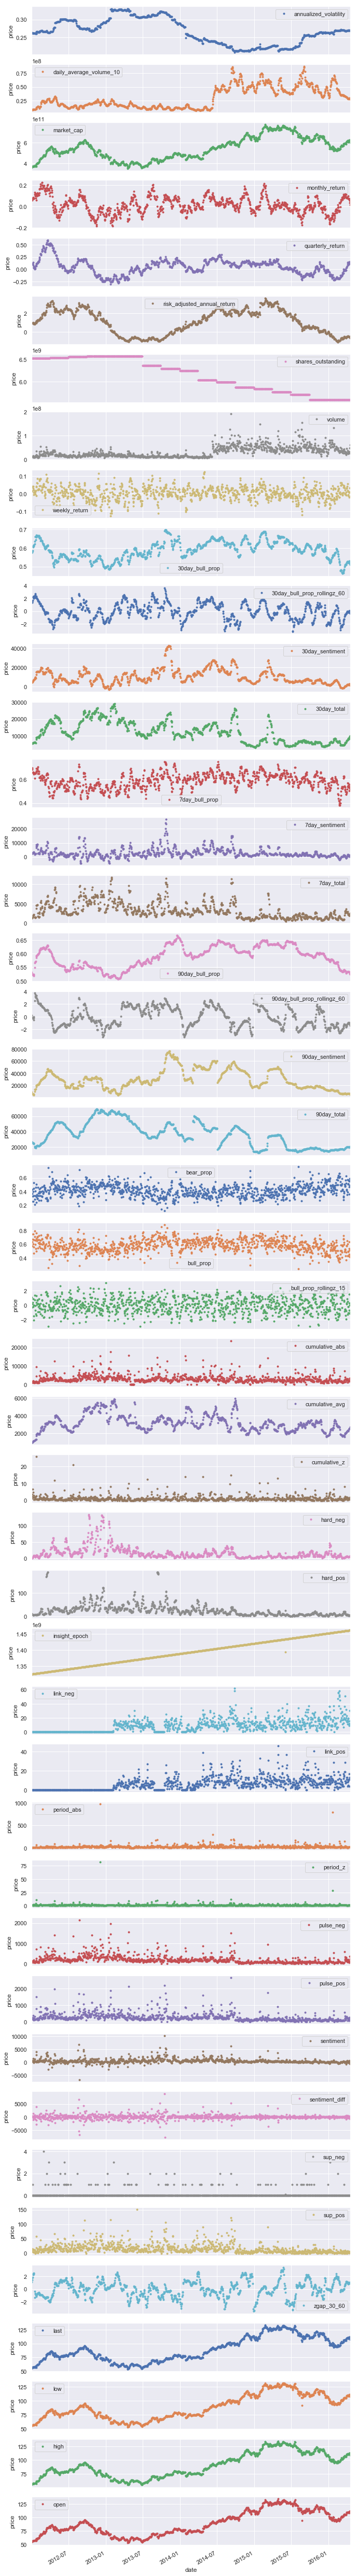

In [187]:
cols_plot = ['last', 'low', 'high', 'open']
axes = combined_df[combined_df.columns].plot(marker='.', linestyle='None', figsize=(11, 100), subplots=True)
for ax in axes:
    ax.set_ylabel('price')

In [165]:
import statsmodels.api as sm

In [180]:
y = combined_df["last"]

In [182]:
y = y.fillna(y.mean())

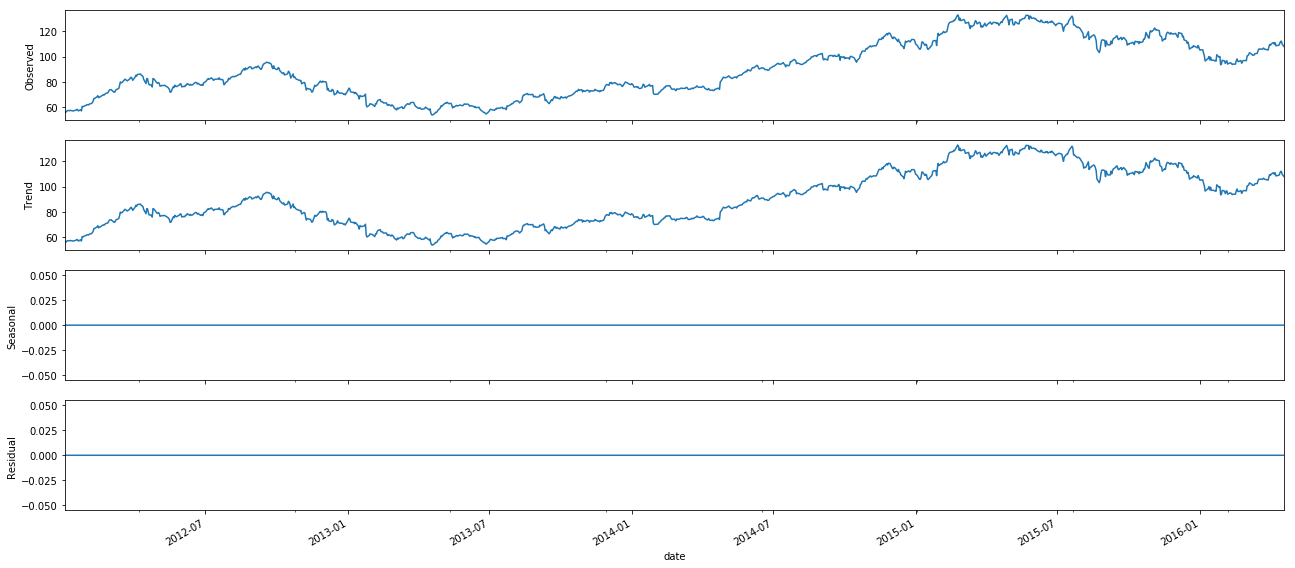

In [177]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(combined_df["last"], model='additive', freq=1)
fig = decomposition.plot()
plt.show()

In [201]:
from statsmodels.tsa.stattools import adfuller
new_df = combined_df.drop(["last","low","open","high"], axis=1)

In [203]:
import statsmodels.api as sm
from patsy import dmatrices

In [204]:
mod = sm.OLS(stock_last, new_df)  
res = mod.fit()  

In [205]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   last   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.017e+04
Date:                Wed, 11 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:45:22   Log-Likelihood:                -748.33
No. Observations:                1086   AIC:                             1571.
Df Residuals:                    1049   BIC:                             1755.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
annualized_volatil

Best alpha using built-in LassoCV: 2305850405.565176
Best score using built-in LassoCV: 0.967248
Lasso picked 1 variables and eliminated the other 43 variables


Index(['market_cap'], dtype='object')

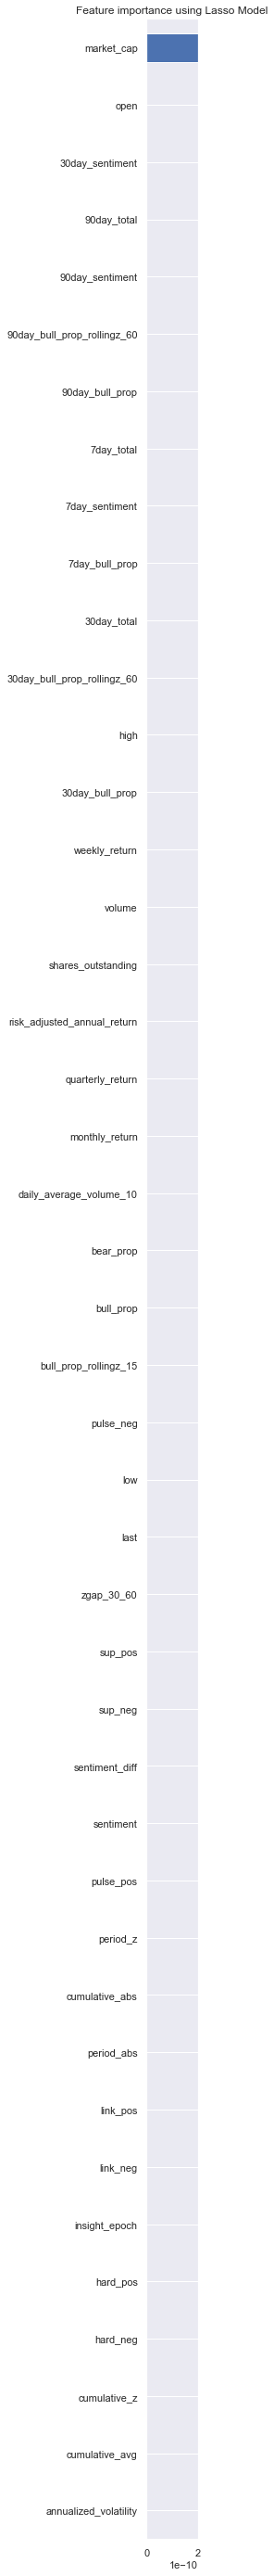

In [212]:
#Ridge regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,RidgeCV
ridgeCV = RidgeCV(cv=5)
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}

df = combined_df

from sklearn.linear_model import Lasso,LassoCV
lassoCV = LassoCV(cv=5)
lassoCV.fit(df,stock_last)
# RidgeCV()
print("Best alpha using built-in LassoCV: %f" % lassoCV.alpha_)
print("Best score using built-in LassoCV: %f" %lassoCV.score(df,stock_last))
coef = pd.Series(lassoCV.coef_, index = df.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
plt.figure(figsize=(1,50))
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

selected_coefs = imp_coef[imp_coef.values != 0]

selected_coefs.index

df_new = df[selected_coefs.index.tolist()]

df_new.columns

In [213]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(df,stock_last, test_size = 0.20, random_state = 10)
#split data set with lasso selected features
data_new_train, data_new_test, target_train, target_test = train_test_split(df_new,stock_last, test_size = 0.20, random_state = 10)

In [216]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(stock_last)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.504755
p-value: 0.531158


In [217]:
df = stock_last

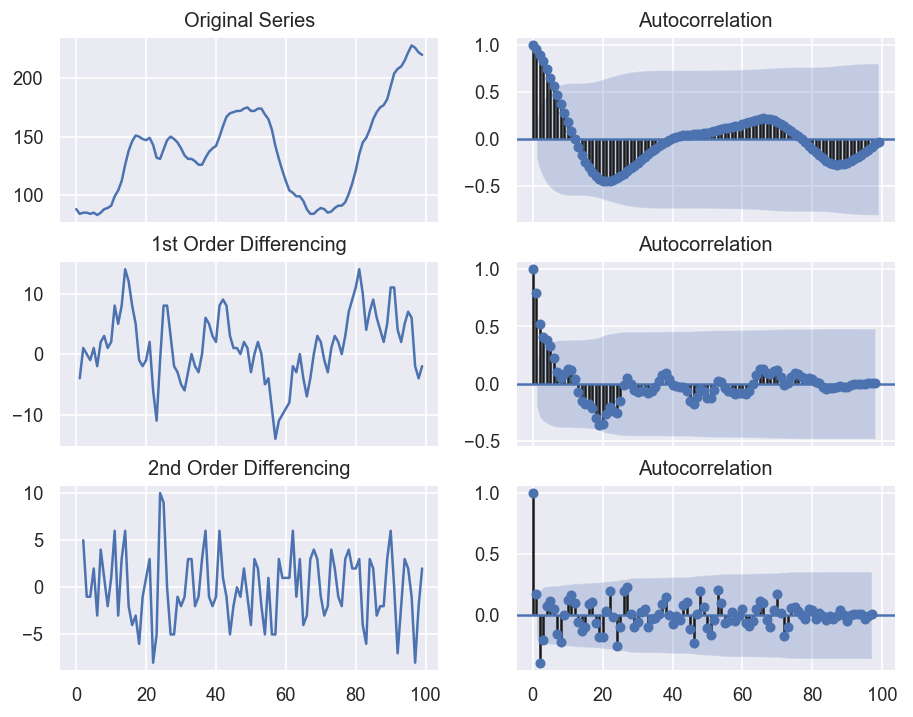

In [218]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [219]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   99
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -253.790
Method:                       css-mle   S.D. of innovations              3.119
Date:                Wed, 11 Dec 2019   AIC                            517.579
Time:                        18:27:27   BIC                            530.555
Sample:                             1   HQIC                           522.829
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1202      1.290      0.868      0.387      -1.409       3.649
ar.L1.D.value     0.6351      0.257      2.469      0.015       0.131       1.139
ma.L1.D.value     0.5287      0.355     

In [220]:
# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -253.790
Method:                       css-mle   S.D. of innovations              3.119
Date:                Wed, 11 Dec 2019   AIC                            515.579
Time:                        18:28:30   BIC                            525.960
Sample:                             1   HQIC                           519.779
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1205      1.286      0.871      0.386      -1.400       3.641
ar.L1.D.value     0.6344      0.087      7.317      0.000       0.464       0.804
ma.L1.D.value     0.5297      0.089     

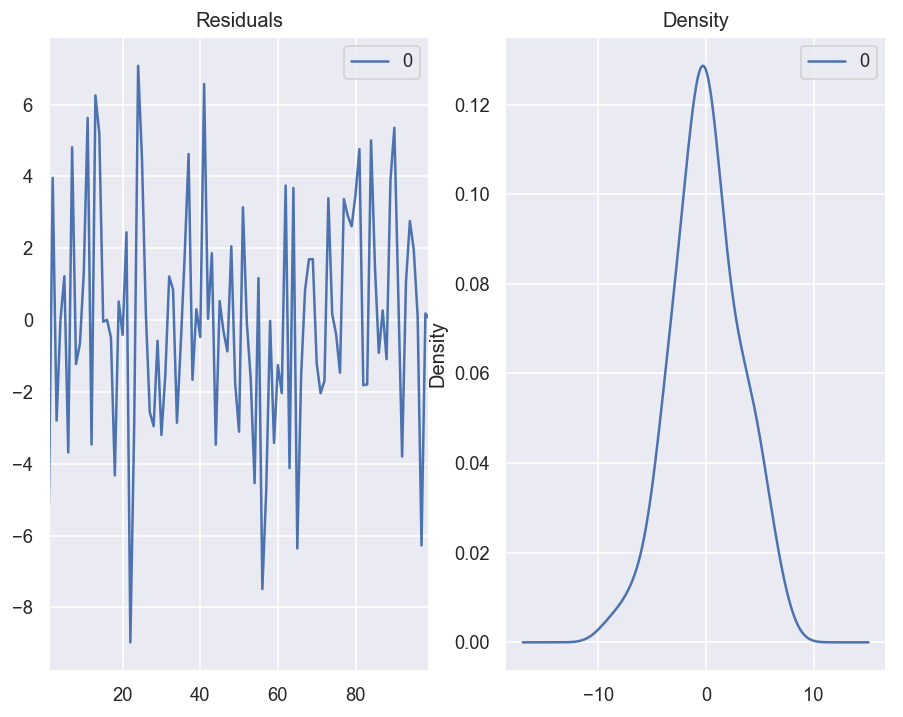

In [221]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

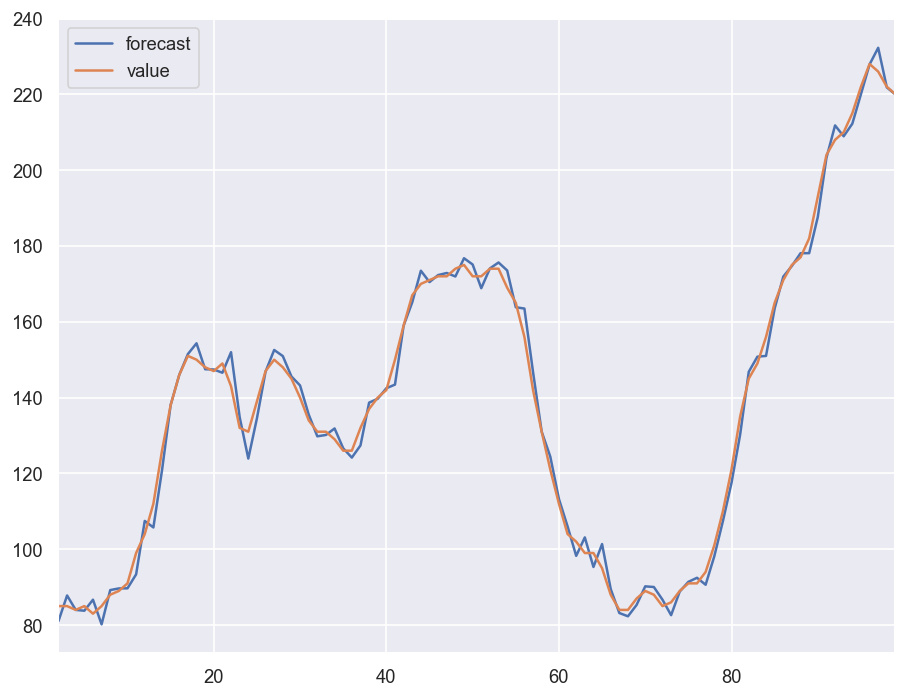

In [222]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()